In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib qt

import numpy as np
import autoreject
from autoreject import AutoReject
import csv
import matplotlib.pyplot as plt
import pandas as pd
import mne
import os
import sys
import glob
from atpbar import atpbar


#sys.path.append('../..')
#from utils.csv_utils_new import *
#from utils.lsl_utils_new import *
#from utils.MNE_utils import *

In [76]:
# define cleaning protocol 

def raw_to_events(raw):
    event_id = {'-1':-1, '1':1, '-2':2, '2':2, '-3':-3, '3':3}
    events = mne.events_from_annotations(raw, event_id=event_id)[0]
    if len(events)==0:
        events = np.zeros((1,3))
        events = events.astype(int)
    return events 

def fname_to_epoch (fname):
    raw = mne.io.read_raw_fif(fname, preload=True)
    raw.plot(title='before')
    raw.filter(l_freq=0.1, h_freq=60)
    #raw.notch_filter(60)
    raw.plot(title='after')
    events = raw_to_events(raw)
    #print (events[:,2])
    
    epochs = mne.Epochs(raw, events, tmin=-0.1, tmax=1.0, baseline=(-0.1, 0), reject={'eeg': 150e-6}, preload=True)
    
    montage = mne.channels.make_standard_montage('standard_1020')
    epochs.set_montage(montage)
    
    return epochs

def plot_evokeds (epochs, subject='-', condition='-'):
    evokeds = dict()
    subset = epochs['1']
    evokeds['standard'] = list(subset.iter_evoked())
    subset = epochs['-1']
    evokeds['oddball'] = list(subset.iter_evoked())
    mne.viz.plot_compare_evokeds(evokeds, picks='Fz', ci=0.95, title=f'global oddball evoked response: subject {str(subject)}, {condition}') #Fz for MMN, Pz for LTP


In [78]:
# Import epochs
paths = glob.glob('../../data/mne_raw/*mmn-raw_phot-events.fif')
paths.sort()
bad = []
for path in paths[30:31]: 
    epochs = fname_to_epoch(path)
    if len(epochs)>0:
        epochs.save(path[:-4]+'_epo.fif', overwrite=True)
    else: 
        bad.append(path)

        
ar = AutoReject(picks=eeg_picks)
epochs_clean = ar.fit_transform(epochs)

plot_evokeds(epochs_clean, condition='ar cleaned')
plot_evokeds(epochs, condition='uncleaned')

Opening raw data file ../../data/mne_raw/sub2-day2-jhana_mmn-raw_phot-events.fif...
    Range : 512 ... 218511 =      2.000 ...   853.559 secs
Ready.
Reading 0 ... 217999  =      0.000 ...   851.559 secs...


/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_95599/20069938.py:12: RuntimeWarning: This filename (../../data/mne_raw/sub2-day2-jhana_mmn-raw_phot-events.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fname, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 8449 samples (33.004 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished


Used Annotations descriptions: ['-1', '1']
Not setting metadata
370 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 370 events and 283 original time points ...
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['Fp1', 'O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['CP6', 'O2']
    Rejecting  epoch based on EEG : ['CP6', 'O2']
    Rejecting  epoch based on EEG : ['F4', 'O2']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4', 'CP6', 'O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['Fp1', 'O2']
    Rejecting  epoch based on EEG : ['Fp1', 'O2']
    Rejecting  epoch based on EEG : ['Fp1', 'O2']
    Rejectin

  0%|          | Creating augmented epochs : 0/32 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/32 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/253 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/253 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/253 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/253 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=1


  0%|          | Repairing epochs : 0/253 [00:00<?,       ?it/s]

Dropped 56 epochs: 0, 1, 2, 4, 6, 7, 8, 9, 10, 11, 12, 13, 16, 17, 19, 20, 21, 22, 23, 26, 29, 32, 33, 35, 37, 38, 46, 48, 53, 56, 57, 58, 61, 67, 70, 71, 74, 75, 78, 81, 84, 87, 90, 93, 95, 102, 114, 130, 141, 143, 144, 158, 161, 194, 227, 240
Channels marked as bad:
none
Channels marked as bad:
none


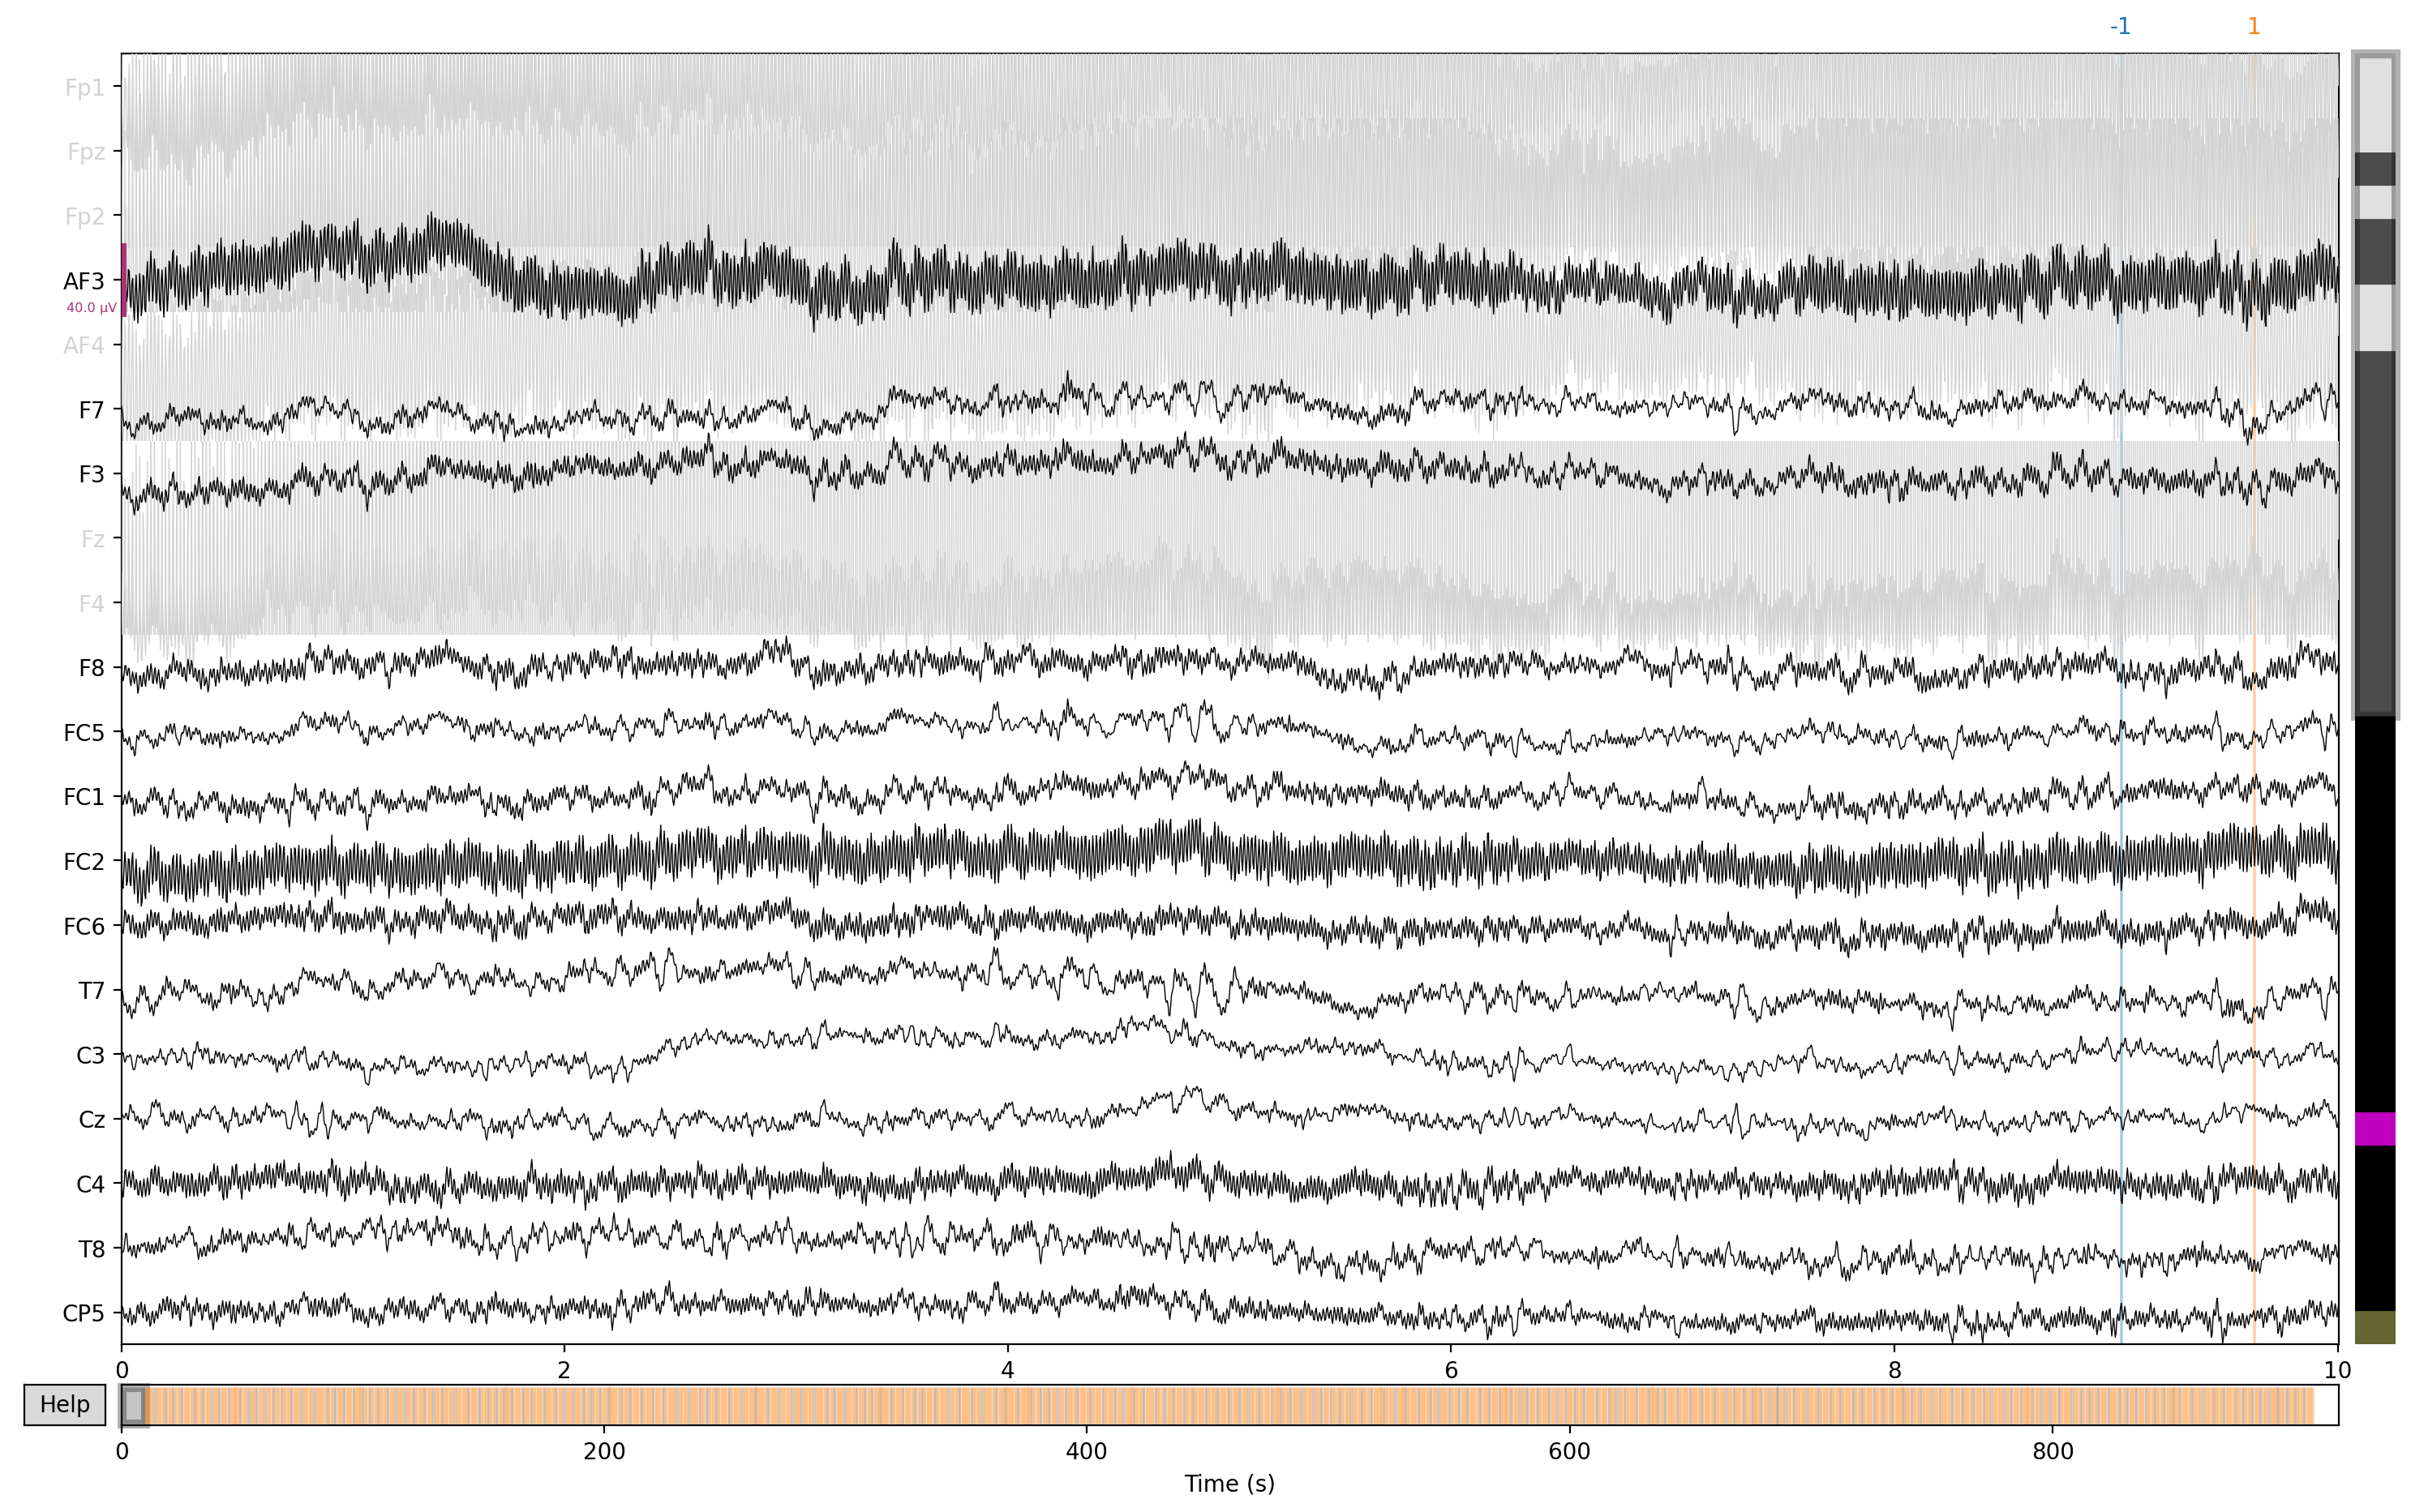

In [81]:
raw.plot()

# Concatenation of all

In [ ]:
paths_mindfulness = glob.glob('../../data/mne_raw/sub?-day?-mindfulness_mmn-raw_phot-events_epo.fif')
paths_jhana = glob.glob('../../data/mne_raw/sub?-day?-jhana_mmn-raw_phot-events_epo.fif')
paths_LTP_pre = glob.glob('../../data/mne_raw/*LTP_pre-rmmn-raw_phot-events.fif')
paths_LTP_post = glob.glob('../../data/mne_raw/*LTP_post-rmmn-raw_phot-events.fif')
paths_control = glob.glob('../../data/mne_raw/sub*-control-mindfulness_mmn-raw_phot-events_epo.fif')


path_names = [
    [paths_mindfulness, 'mindfulness'],
    [paths_jhana, 'jhana'],
    [paths_LTP_pre, 'LTP_pre'],
    [paths_LTP_post, 'LTP_post'],
    [paths_control, 'control'],
]

for paths, name in path_names: 
    paths.sort()
    epochs_all = None
    for path in paths:
        epochs = mne.read_epochs(path)
        try:
            epochs_all = epochs if epochs_all is None else mne.concatenate_epochs([epochs_all, epochs])
        except:
            continue 
    epochs_all.save(os.path.dirname(path) + '/' + name + '_all_epo.fif', overwrite=True)    